# Clustering

## Overview

### Arguments

Arguemnts |  |
-------|-----
obj | Object to summarize
X | Data. Default: *None*
labels | Clusters assignment. Default: *None*
labels_true | True cluster assignment. Default: *None*
store_X| If X is stored as attribute. Default: *None*

### Functions

Algorithm | Function | Summary |
-----|------|-------
Kmeans | [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)| kmeansSummary
Mini Batch KMeans | [MiniBatchKMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html?highlight=minibatchkmeans#sklearn.cluster.MiniBatchKMeans) | MiniBatchKMeansSummary
Gaussian mixture models |[GaussianMixture](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html?highlight=gmm)| gmmSummary
Mean Shift | [MeanShift]((https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html?highlight=meanshift)) | MeanShiftSummary
DBSCAN | [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.dbscan.html?highlight=dbscan#sklearn.cluster.dbscan) | dbscanSummary
OPTICS | [OPTICS](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.OPTICS.html?highlight=optics#sklearn.cluster.OPTICS)| opticsSummary

## Kmeans

In [8]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from mlsummary.clustering import kmeansSummary

iris = load_iris()
iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
X = iris.drop(columns=['target'])
y = iris['target']
km = KMeans().fit(X)

In [9]:
km_summary = kmeansSummary(km)
km_summary.describe()

K-Means algorithm
------------------
Number of clusters: 8
Initialization: k-means++
Number of iterations: 9
Number of initialisations: 10
Labels name: [0 1 2 3 4 5 6 7]
Clusters weights: 
   0   1   2   3   4   5   6  7
 24  28  22  12  20  22  18  4
Clusters weights: 
     0         1         2     3         4         5     6         7
 0.16  0.186667  0.146667  0.08  0.133333  0.146667  0.12  0.026667


In [10]:
km_summary = kmeansSummary(km, X=X, labels_true=y)
km_summary.describe()

K-Means algorithm
------------------
Number of clusters: 8
Initialization: k-means++
Number of iterations: 9
Number of initialisations: 10
Labels name: [0 1 2 3 4 5 6 7]
Adjusted Rand Index: 0.457
Fowlkes Mallows: 0.617
Silhouette: 0.36
Davies Bouldin: 0.927
Calinski Harabasz: 439.461
Clusters weights: 
   0   1   2   3   4   5   6  7
 24  28  22  12  20  22  18  4
Clusters weights: 
     0         1         2     3         4         5     6         7
 0.16  0.186667  0.146667  0.08  0.133333  0.146667  0.12  0.026667


In [11]:
print('Adjusted rand Index: {}'.format(km_summary.ari(labels = km_summary.labels, labels_true = y)))
print('Fowlkes Mallows: {}'.format(km_summary.fm(labels = km_summary.labels, labels_true = y)))
print('Silhouette: {}'.format(km_summary.sil(labels = km_summary.labels, X = X)))
print('Davies_Bouldin: {}'.format(km_summary.db(labels = km_summary.labels, X = X)))
print('Calinski_Harabasz: {}'.format(km_summary.ch(labels = km_summary.labels, X = X)))

Adjusted rand Index: 0.457
Fowlkes Mallows: 0.617
Silhouette: 0.36
Davies_Bouldin: 0.927
Calinski_Harabasz: 439.461


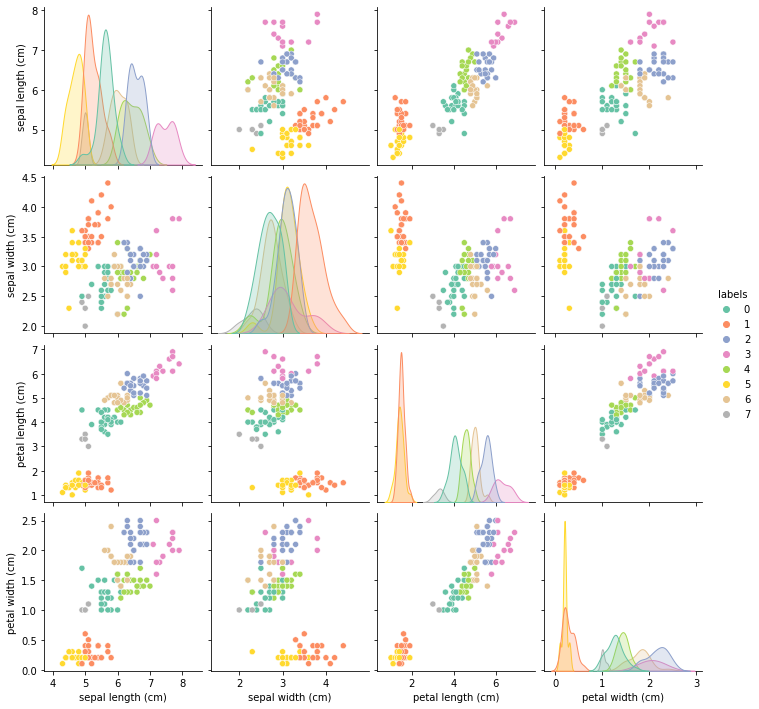

In [12]:
km_summary.plot(X)

In [13]:
print(pd.DataFrame((km_summary.__dict__.keys()), columns = ['Attribute']))

          Attribute
0             model
1        n_clusters
2         variables
3               SIL
4                DB
5                CH
6           centers
7            labels
8      labels_names
9      cluster_size
10  cluster_weights
11              ARI
12               FM
13             iter
14             init
15        init_type
16   algorithm_type
17                X
18      labels_true


## Mini Batch KMeans

In [14]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import MiniBatchKMeans
from mlsummary.clustering import MiniBatchKMeansSummary

iris = load_iris()
iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
X = iris.drop(columns=['target'])
y = iris['target']
minikm = MiniBatchKMeans().fit(X)

In [15]:
minikm_summary = MiniBatchKMeansSummary(minikm, X=X, labels_true=y, store_X=True)
minikm_summary.describe()

Mini Batch KMeans algorithm
------------------
Number of clusters: 8
Initialization: k-means++
Number of iterations: 17
Number of initialisations: 3
Labels name: [0 1 2 3 4 5 6 7]
Adjusted Rand Index: 0.443
Fowlkes Mallows: 0.605
Silhouette: 0.341
Davies Bouldin: 0.978
Calinski Harabasz: 436.157
Clusters weights: 
   0   1  2   3   4   5   6   7
 22  24  7  28  10  21  19  19
Clusters weights: 
         0     1         2         3         4     5         6         7
 0.146667  0.16  0.046667  0.186667  0.066667  0.14  0.126667  0.126667


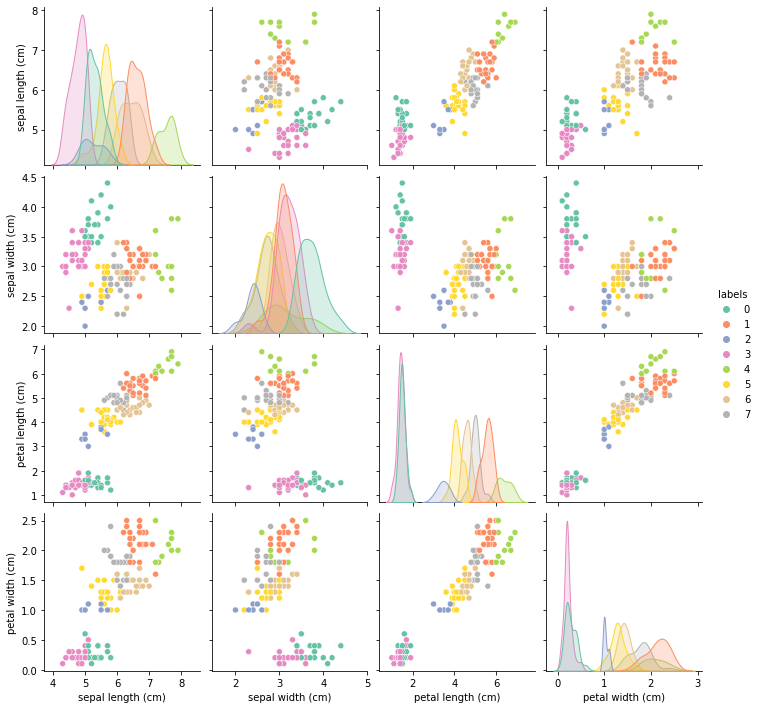

In [16]:
minikm_summary.plot()


In [17]:
print(pd.DataFrame((minikm_summary.__dict__.keys()), columns = ['Attribute']))

          Attribute
0             model
1        n_clusters
2         variables
3               SIL
4                DB
5                CH
6           centers
7            labels
8      labels_names
9      cluster_size
10  cluster_weights
11              ARI
12               FM
13             iter
14             init
15        init_type
16   algorithm_type
17                X
18      labels_true


## Gaussian mixture models

In [18]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.mixture import GaussianMixture
from mlsummary.clustering import gmmSummary

iris = load_iris()
iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
X = iris.drop(columns=['target'])
y = iris['target']
gmm = GaussianMixture(n_components = 2).fit(X)

In [19]:
gmm_summary = gmmSummary(gmm, X = X)
gmm_summary.describe()

Gaussian Mixture Models
--------------------
Number of clusters: 2
Initialization: kmeans
Number of initialisations: 1
Labels name: [0 1]
BIC: 574.018
Silhouette: 0.687
Davies Bouldin: 0.383
Calinski Harabasz: 502.822
Clusters weights: 
    0   1
 100  50


In [20]:
print(gmm_summary.covariance_type)

full


In [21]:
print(gmm_summary.BIC)

574.018


In [22]:
gmm_summary.proba

,Cluster 1,Cluster 2
0,2.180440e-11,1.000000e+00
1,7.813277e-08,9.999999e-01
2,4.902633e-09,1.000000e+00
3,1.329406e-07,9.999999e-01
4,6.911481e-12,1.000000e+00
...,...,...
145,1.000000e+00,2.826664e-153
146,1.000000e+00,4.124123e-127
147,1.000000e+00,1.099361e-136
148,1.000000e+00,2.140072e-158


In [23]:
print('Adjusted rand Index: {}'.format(gmm_summary.ari(labels = gmm_summary.labels, labels_true = y)))

Adjusted rand Index: 0.568


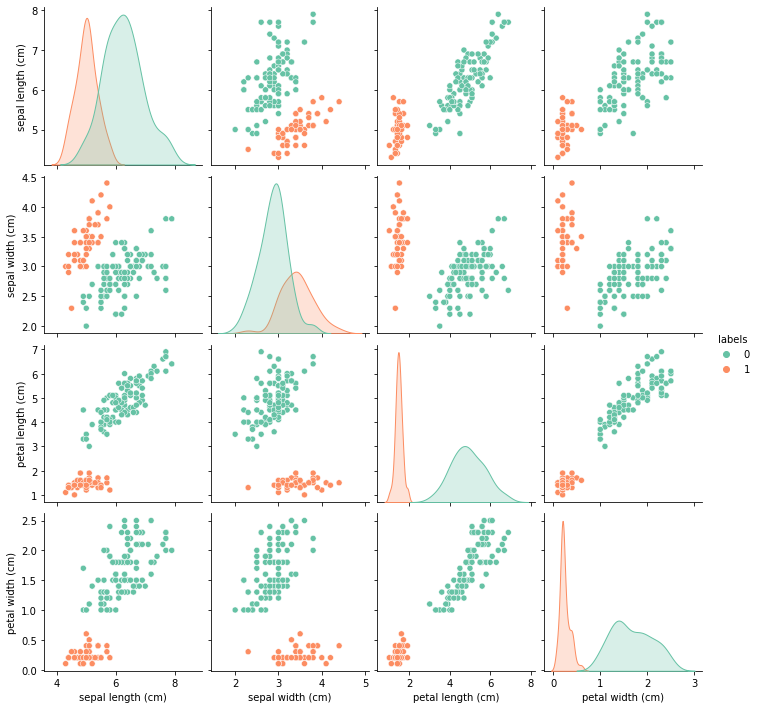

In [24]:
gmm_summary.plot(X)

In [25]:
print(pd.DataFrame((gmm_summary.__dict__.keys()), columns = ['Attribute']))

          Attribute
0             model
1        components
2         variables
3   covariance_type
4           centers
5        covariance
6            labels
7             proba
8      cluster_size
9      labels_names
10  cluster_weights
11              ARI
12               FM
13              SIL
14               DB
15               CH
16              BIC
17              AIC
18             iter
19             init
20        init_type
21                X
22      labels_true


## Mean Shift

In [26]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import MeanShift
from mlsummary.clustering import MeanShiftSummary

iris = load_iris()
iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
X = iris.drop(columns=['target'])
y = iris['target']
msh = MeanShift().fit(X)

In [27]:
msh_summary = MeanShiftSummary(msh, X = X, labels_true=y)
msh_summary.describe()


Mean Shift algorithm
------------------
Number of clusters: 2
Bandwidth: None
Number of iterations: 14
Labels name: [0 1]
Adjusted Rand Index: 0.558
Fowlkes Mallows: 0.764
Silhouette: 0.686
Davies Bouldin: 0.389
Calinski Harabasz: 509.703
Clusters weights: 
   0   1
 99  51
Clusters weights: 
     0     1
 0.66  0.34


In [28]:
print(msh_summary.ARI)

0.558


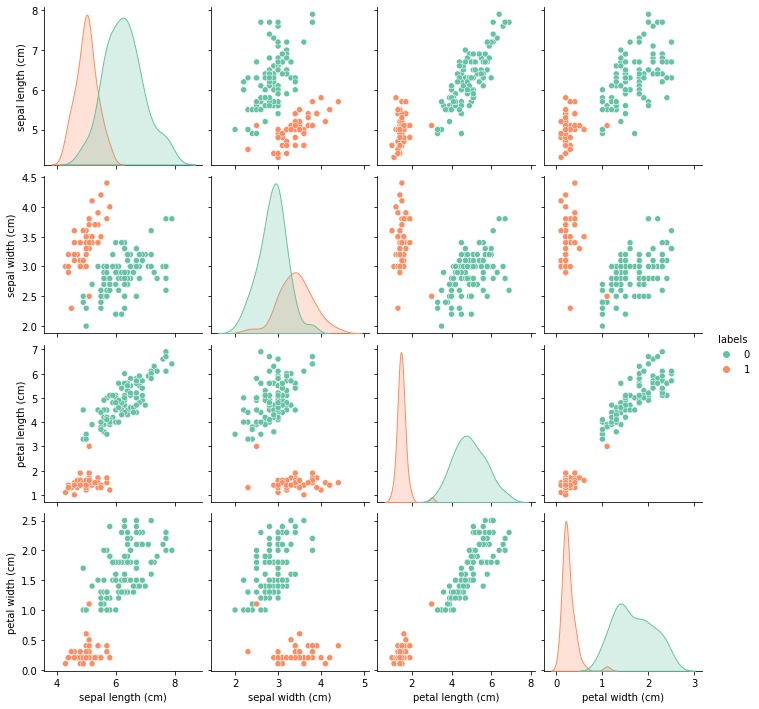

In [29]:
msh_summary.plot(X)

## DBSCAN

In [30]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
from mlsummary.clustering import dbscanSummary

iris = load_iris()
iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
X = iris.drop(columns=['target'])
y = iris['target']
dbscan = DBSCAN().fit(X)

In [31]:
dbscan_summary = dbscanSummary(dbscan, X = X, labels_true=y)
dbscan_summary.describe()

DBSCAN algorithm
------------------
Number of clusters: 3
Labels name: 4
eps: 0.5
Min samples: 5
Metric: euclidean
Algorithm: auto
Leaf size: 30
Adjusted Rand Index: 0.521
Fowlkes Mallows: 0.705
Silhouette: 0.486
Davies Bouldin: 7.222
Calinski Harabasz: 220.298
Clusters weights: 
  -1   0   1
 17  49  84
Clusters weights: 
        -1         0     1
 0.113333  0.326667  0.56


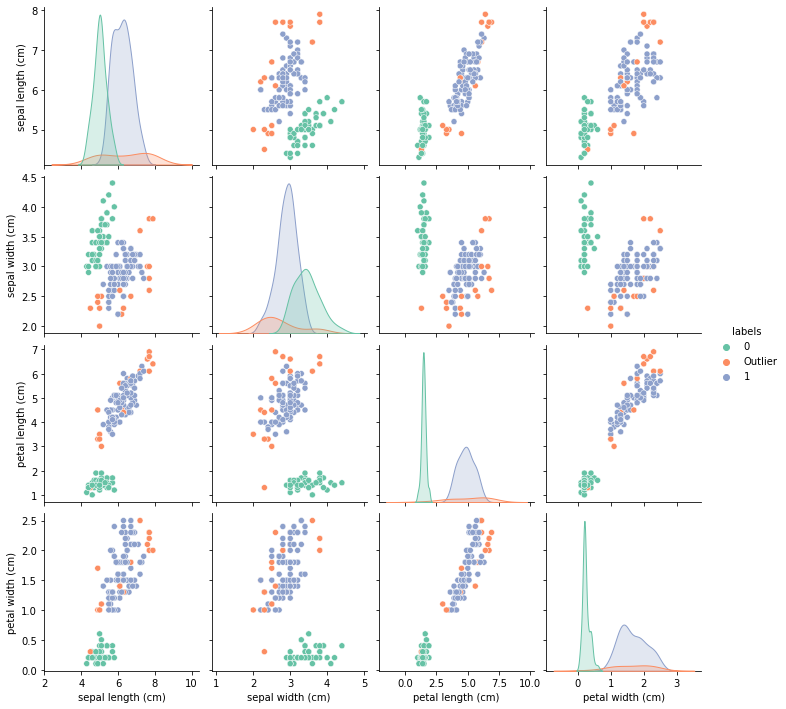

In [32]:
dbscan_summary.plot(X)

## OPTICS

In [33]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import OPTICS
from mlsummary.clustering import opticsSummary

iris = load_iris()
iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
X = iris.drop(columns=['target'])
y = iris['target']
optics = OPTICS().fit(X)


In [34]:
optics_summary = dbscanSummary(optics, X = X, labels_true=y)
optics_summary.describe()

DBSCAN algorithm
------------------
Number of clusters: 7
Labels name: 4
eps: None
Min samples: 5
Metric: minkowski
Algorithm: auto
Leaf size: 30
Adjusted Rand Index: 0.091
Fowlkes Mallows: 0.406
Silhouette: -0.203
Davies Bouldin: 2.283
Calinski Harabasz: 11.723
Clusters weights: 
  -1   0  1   2   3  4   5
 87  14  7  15  10  5  12
Clusters weights: 
    -1         0         1    2         3         4     5
 0.58  0.093333  0.046667  0.1  0.066667  0.033333  0.08


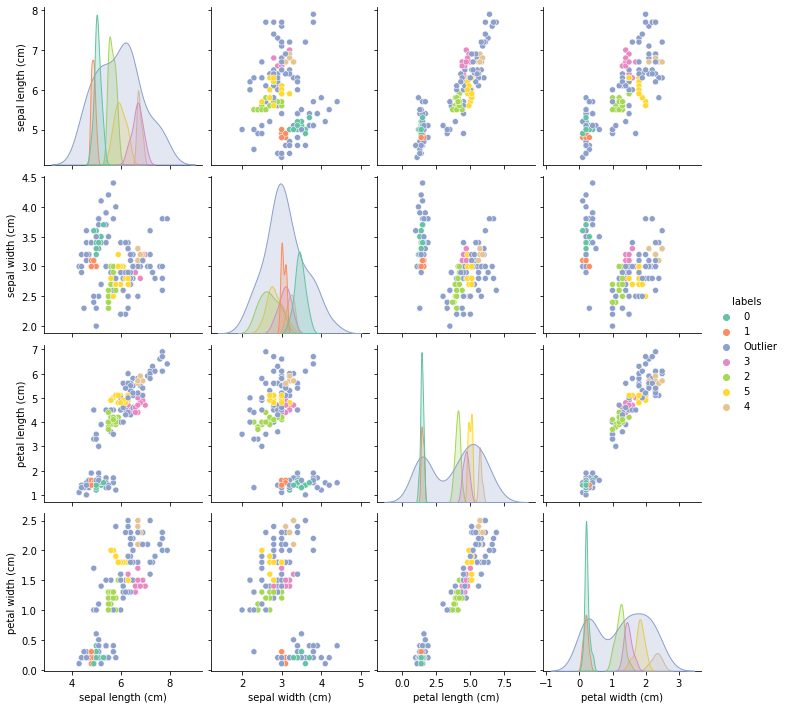

In [35]:
optics_summary.plot(X)
